In [40]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
import imutils
import cv2
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.datasets import mnist
from sklearn.model_selection import cross_val_score



Populating the interactive namespace from numpy and matplotlib


In [22]:
(trainData, trainLabels), (testData, testLabels) = mnist.load_data()

trainData = trainData.reshape(60000, 784)
testData = testData.reshape(10000, 784)

trainData = trainData[:10000]
trainLabels = trainLabels[:10000]

testData = testData[:2000]
testLabels = testLabels[:2000]

trainData = trainData.astype('float32')
testData = testData.astype('float32')

trainData /= 255
testData /= 255



In [23]:
# Checking sizes of each data split
print("training data points: {}".format(len(trainLabels)))
print("testing data points: {}".format(len(testLabels)))


training data points: 9000
validation data points: 1000
testing data points: 2000


In [44]:
# Lista de valores de K impares (1,3,5,7,9..39)
kVals = range(1, 60, 2)
accuracies = []

#En este loop vamos a ver la precision del algoritmo en funcion de K

for k in kVals:
    #Inicializacion del modelo
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)

    #A diferencia de otros algoritmos, en KNN no es necesario usar un set de validacion sino que se pueden usar los mismos datos
    score = model.score(trainData[:1000], trainLabels[:1000])
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

# largest accuracy
# np.argmax returns the indices of the maximum values along an axis
i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i], accuracies[i] * 100))


k=1, accuracy=100.00%
k=3, accuracy=96.80%
k=5, accuracy=95.60%
k=7, accuracy=95.70%
k=9, accuracy=95.60%
k=11, accuracy=95.30%
k=13, accuracy=94.90%
k=15, accuracy=94.30%
k=17, accuracy=94.30%
k=19, accuracy=94.40%
k=21, accuracy=94.10%
k=23, accuracy=93.90%
k=25, accuracy=93.40%
k=27, accuracy=93.20%
k=29, accuracy=93.10%
k=31, accuracy=93.20%
k=33, accuracy=93.10%
k=35, accuracy=92.80%
k=37, accuracy=92.50%
k=39, accuracy=92.00%
k=41, accuracy=92.20%
k=43, accuracy=92.00%
k=45, accuracy=91.80%
k=47, accuracy=91.50%
k=49, accuracy=91.10%
k=51, accuracy=91.20%
k=53, accuracy=90.80%
k=55, accuracy=90.70%
k=57, accuracy=90.90%
k=59, accuracy=90.40%
k=1 achieved highest accuracy of 100.00% on validation data


In [45]:
# Podemos probar con K=7
model = KNeighborsClassifier(n_neighbors=7)
model.fit(trainData, trainLabels)

# Predict labels for the test set
predictions = model.predict(testData)

# Evaluate performance of model for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, predictions))



EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.98      1.00      0.99        99
          1       0.95      1.00      0.97       104
          2       0.98      0.96      0.97       104
          3       0.97      0.94      0.95        88
          4       0.95      0.92      0.93       100
          5       0.94      0.96      0.95        94
          6       0.94      0.99      0.96        96
          7       0.95      0.95      0.95       112
          8       1.00      0.93      0.96        98
          9       0.92      0.92      0.92       105

avg / total       0.96      0.96      0.96      1000



I think that digit is: [3]


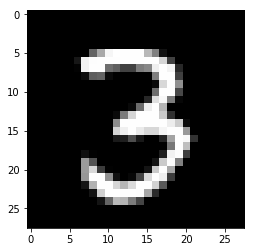

I think that digit is: [4]


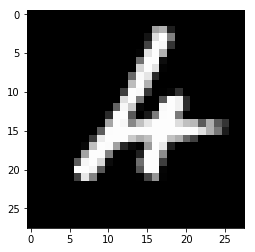

I think that digit is: [3]


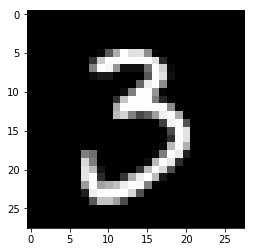

I think that digit is: [6]


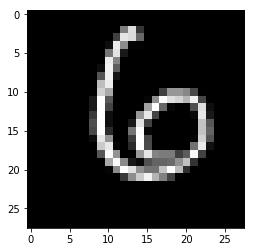

I think that digit is: [6]


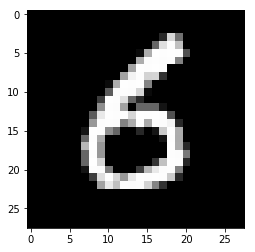

In [25]:
#  Probamos la clasificación en un escenario real
for i in np.random.randint(0, high=len(testLabels), size=(5,)):
    # np.random.randint(low, high=None, size=None, dtype='l')
    image = testData[i]
    prediction = model.predict([image])
    # show the prediction
    print("I think that digit is: {}".format(prediction))

    pixels = np.array(image, dtype='float32')

    # Reshape the array into 28 x 28 array (2-dimensional array)
    pixels = pixels.reshape((28, 28))

    # Plot
    plt.imshow(pixels, cmap='gray')
    plt.show()


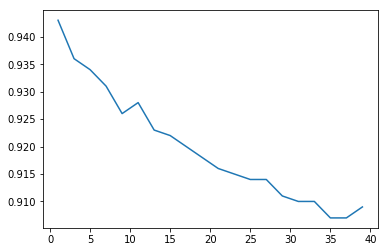

In [36]:
plt.plot(kVals, accuracies)


TypeError: unsupported operand type(s) for -: 'int' and 'list'

In [32]:
squarer = lambda x: 1-x

In [34]:
lambda [1,2,3]: x

SyntaxError: invalid syntax (<ipython-input-34-eb76e26f64a7>, line 1)